In [ ]:
#WEATHER API PROJECT – SOUTHEAST U.S. CITIES

In [ ]:
#Libraries

In [4]:
import requests

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import datetime

In [8]:
import os

In [9]:
#I want to use my API key without putting it directly in the code 
#The key goes into a .env file saved locally. 
#The.gitignore file in the project folder tells git not to upload the .env file

In [10]:
#Package to read the .env file

In [11]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [12]:
from dotenv import load_dotenv

In [13]:
#Load the .env file

In [14]:
load_dotenv()

True

In [15]:
#Get the API key from the .env file
API_KEY = os.getenv("OPENWEATHER_API_KEY")
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

In [16]:
#List of cities
cities = ["Atlanta", "Miami", "Orlando", "Tampa", "Charlotte", "Nashville", "New Orleans"]

In [17]:
#Storage for weather data
weather_data = []

In [20]:
#Fetch weather data for each city
for city in cities:
    params = {
        "q": city,              
        "appid": API_KEY,       
        "units": "imperial"       
    }

    response = requests.get(BASE_URL, params=params)  
    
    if response.status_code == 200:                  
        data = response.json()  
        
        city_weather = {                            
            "city": city,
            "temperature": data["main"]["temp"], 
            "humidity": data["main"]["humidity"],    
            "wind_speed": data["wind"]["speed"],     
            "description": data["weather"][0]["description"],
            "date": datetime.date.today()          
        }
        
        weather_data.append(city_weather)   
        
    else:
        print(f"Failed to get data for {city}")

In [21]:
df = pd.DataFrame(weather_data)

In [22]:
display(df)

,city,temperature,humidity,wind_speed,description,date
0,Atlanta,74.89,68,8.05,clear sky,2025-09-04
1,Miami,82.24,84,0.00,broken clouds,2025-09-04
2,Orlando,83.43,81,6.91,clear sky,2025-09-04
3,Tampa,83.53,78,10.36,broken clouds,2025-09-04
4,Charlotte,72.91,70,8.05,few clouds,2025-09-04
5,Nashville,71.91,85,6.91,haze,2025-09-04
6,New Orleans,83.32,64,4.61,clear sky,2025-09-04


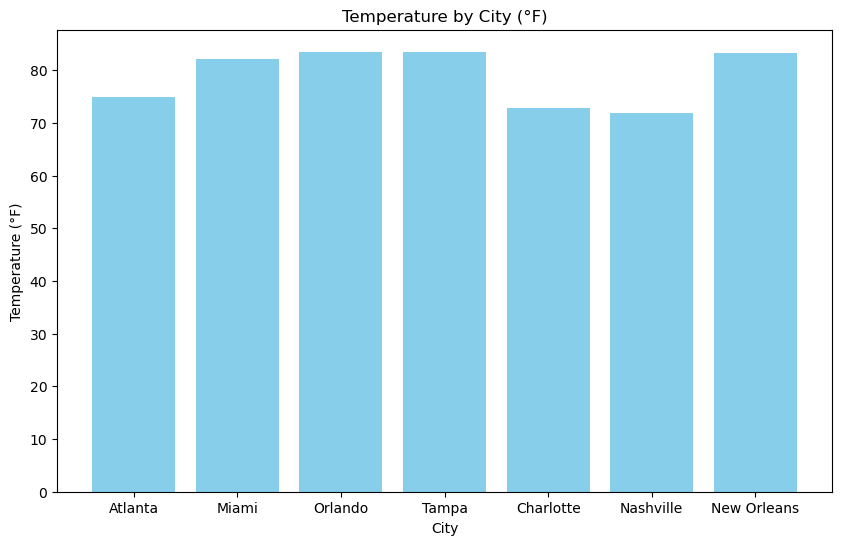

In [29]:
#Temperature comparison
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['temperature'], color='skyblue')
plt.title("Temperature by City (°F)")
plt.xlabel("City")
plt.ylabel("Temperature (°F)")

plt.savefig("temperature_plot.png")  
plt.show()


In [28]:
plt.savefig("temperature_plot.png")

<Figure size 640x480 with 0 Axes>

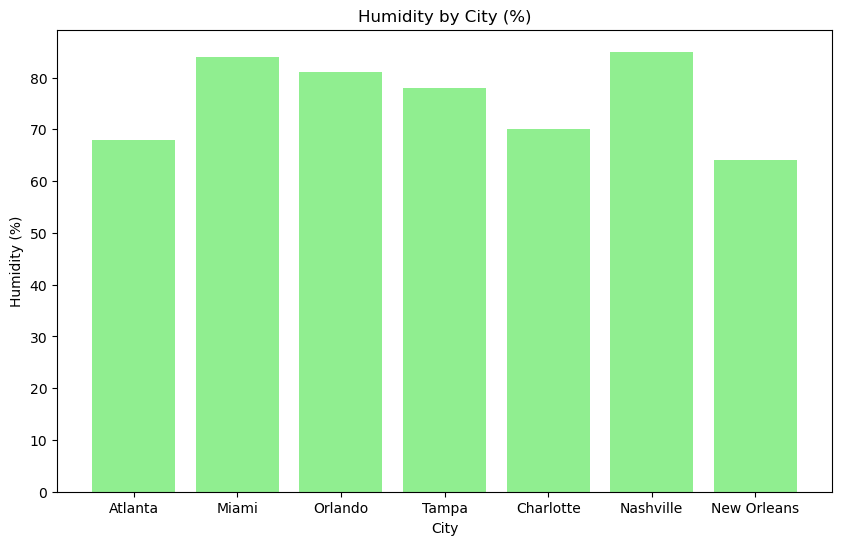

In [30]:
#Humidity comparison
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['humidity'], color='lightgreen')
plt.title("Humidity by City (%)")
plt.xlabel("City")
plt.ylabel("Humidity (%)")

plt.savefig("humidity_plot.png")
plt.show()


In [25]:
#Save the data in a CSV file (optional)
file_path = "data/weather_data.csv"
os.makedirs("data", exist_ok=True)
df.to_csv(file_path, index=False)